In [1]:
#라이브러리 import
import requests
import pprint
import json
import pandas as pd
import numpy as np


In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',50)

In [3]:
year_map = list(range(2021,2024))
month_map = ['0'+str(i) if i<10 else str(i) for i in range(1,13)]

rc_month = [f'{y}{m}' for y in year_map for m in month_map]

In [168]:
# url 입력
## 배당률 불러오기
meet = 1 # 1: 서울, 2: 제주, 3: 부산
odds = ['WIN', 'QNL','TLA']
rc_no = list(range(1, 16))

cnt_b = 0
for ym in rc_month:
    for o in odds:
        for rc in rc_no:
            try:

                odds_url = f'https://apis.data.go.kr/B551015/API160_1/integratedInfo_1?serviceKey=%2FpKtn0KFociUr9CM316rFT6o8sUrRD8yjSLuICPzxXarC8O%2FrUc1pjHc%2FCpuEwB5r4%2BimnNKYuJEjPKARyZCuw%3D%3D&pageNo=1&numOfRows=10000&pool={o}&rc_month={ym}&rc_no={rc}&meet={meet}&_type=json'

                response = requests.get(odds_url)

                contents = response.text

                ## json을 DataFrame으로 변환하기 ##

                #문자열을 json으로 변경
                json_ob = json.loads(contents)

                # 필요한 내용만 꺼내기
                body = json_ob['response']['body']['items']['item']
            except Exception as e:
                print('e',e)
                continue

            # Dataframe으로 만들기
            dataframe = pd.json_normalize(body)

            df_odds = dataframe if cnt_b == 0 else pd.concat([df_odds, dataframe], axis=0)
            cnt_b +=1


e Expecting value: line 1 column 1 (char 0)
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e st

In [ ]:
df_odds.to_csv('odds_2021_2023.csv', index=False)

In [ ]:
meet = 1 # 1: 서울, 2: 제주, 3: 부산
rc_no = list(range(1, 16))

## 경기 정보 불러오기
cnt = 0
for ym in rc_month:
    for rc in rc_no:
        try:
            detail_url = f'https://apis.data.go.kr/B551015/API4_2/raceResult_2?serviceKey=%2FpKtn0KFociUr9CM316rFT6o8sUrRD8yjSLuICPzxXarC8O%2FrUc1pjHc%2FCpuEwB5r4%2BimnNKYuJEjPKARyZCuw%3D%3D&pageNo=1&numOfRows=10000&meet={meet}&&rc_month={ym}&rc_no={rc}&_type=json'

            response = requests.get(detail_url)

            contents = response.text

            ## json을 DataFrame으로 변환하기 ##
            #문자열을 json으로 변경
            json_ob = json.loads(contents)

            # 필요한 내용만 꺼내기
            body = json_ob['response']['body']['items']['item']
        except Exception as e:
            print('e',e)
            continue

        # pandas import

        # Dataframe으로 만들기
        dataframe = pd.json_normalize(body)
        if 0 in dataframe.ord.unique():
            continue
        else:
            drop_n = np.sum(dataframe.ord.unique() > 90)
            if drop_n > 3:
                continue
            elif drop_n <= 3:
                dataframe = dataframe.drop(list(dataframe[dataframe['ord']>90].index))

            df_all = dataframe if cnt == 0 else pd.concat([df_all, dataframe], axis=0)
            cnt +=1

e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indic

In [6]:
df_all

age ageCond  buG1fAccTime  buG1fOrd  buG2fAccTime  buG2fOrd  buG3fAccTime  \
0     3    연령오픈             0         0             0         0             0   
1     3    연령오픈             0         0             0         0             0   
2     3    연령오픈             0         0             0         0             0   
3     3    연령오픈             0         0             0         0             0   
4     3    연령오픈             0         0             0         0             0   
..  ...     ...           ...       ...           ...       ...           ...   
81    4    연령오픈             0         0             0         0             0   
82    6    연령오픈             0         0             0         0             0   
83    4    연령오픈             0         0             0         0             0   
84    5    연령오픈             0         0             0         0             0   
85    5    연령오픈             0         0             0         0             0   

    buG3fOrd  buG4fAccTime  buG4fOrd  buG6fAccTime  buG6fOrd  buG8fAccTime  \
0          0             0         0             0         0             0   
1          0             0         0             0         0             0   
2          0             0         0             0         0             0   
3          0             0         0             0         0             0   
4          0             0         0             0         0             0   
..       ...           ...       ...           ...       ...           ...   
81         0             0         0             0         0             0   
82         0             0         0             0         0             0   
83         0             0         0             0         0             0   
84         0             0         0             0         0             0   
85         0             0         0             0         0             0   

    buG8fOrd  buS1fAccTime  buS1fOrd  buS1fTime  bu_10_8fTime  bu_1fGTime  \
0          0             0         0          0             0           0   
1          0             0         0          0             0           0   
2          0             0         0          0             0           0   
3          0             0         0          0             0           0   
4          0             0         0          0             0           0   
..       ...           ...       ...        ...           ...         ...   
81         0             0         0          0             0           0   
82         0             0         0          0             0           0   
83         0             0         0          0             0           0   
84         0             0         0          0             0           0   
85         0             0         0          0             0           0   

    bu_2fGTime  bu_3fGTime  bu_4_2fTime  bu_6_4fTime  bu_8_6fTime budam  \
0            0           0            0            0            0   별정A   
1            0           0            0            0            0   별정A   
2            0           0            0            0            0   별정A   
3            0           0            0            0            0   별정A   
4            0           0            0            0            0   별정A   
..         ...         ...          ...          ...          ...   ...   
81           0           0            0            0            0   핸디캡   
82           0           0            0            0            0   핸디캡   
83           0           0            0            0            0   핸디캡   
84           0           0            0            0            0   핸디캡   
85           0           0            0            0            0   핸디캡   

    buga1  buga2  buga3  chaksun1  chaksun2  chaksun3  chaksun4  chaksun5  \
0       0      0      0   8800000   5500000   3740000   2420000   1540000   
1       0      0      0   8800000   5500000   3740000   2420000   1540000   
2       0      0      0   8800000   5

In [7]:
df_odds

chulNo  chulNo2  chulNo3 meet   odds  pool    rcDate  rcNo
0          1        0        0   서울   92.8   단승식  20210108     1
1          2        0        0   서울    1.8   단승식  20210108     1
2          3        0        0   서울   92.8   단승식  20210108     1
3          4        0        0   서울   92.8   단승식  20210108     1
4          5        0        0   서울   92.8   단승식  20210108     1
...      ...      ...      ...  ...    ...   ...       ...   ...
1180       6        9       10   서울  561.3  삼복승식  20230723    10
1181       7        8        9   서울  381.4  삼복승식  20230723    10
1182       7        8       10   서울  146.5  삼복승식  20230723    10
1183       7        9       10   서울  635.5  삼복승식  20230723    10
1184       8        9       10   서울  214.1  삼복승식  20230723    10

[619550 rows x 8 columns]

In [8]:
busan_info = list()
jeju_info = list()
seoul_info = list()
snj = list()

for c in df_all.columns:
    if ('buG' in c) or ('buS' in c) or ('bu_' in c) :
        busan_info.append(c)

    elif ('jeG' in c) or ('jeS' in c) or ('je_' in c) :
        jeju_info.append(c)
    
    elif ('seG' in c) or ('seS' in c) or ('se_' in c) :
        seoul_info.append(c)
    
    elif ('sj' in c):
        snj.append(c)

In [9]:
df = df_all.copy()
if meet==1:
    busan_info.extend(jeju_info)
    df.drop(busan_info, axis=1, inplace=True)
    print(df)

    age ageCond budam  buga1  buga2  buga3  chaksun1  chaksun2  chaksun3  \
0     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
1     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
2     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
3     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
4     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
..  ...     ...   ...    ...    ...    ...       ...       ...       ...   
81    4    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   
82    6    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   
83    4    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   
84    5    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   
85    5    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   

    chaksun4  chaksun5  chulNo diffUnit  hrName     hrNo  ilsu jkName    jkNo  \
0    2

In [10]:
df.head()

age ageCond budam  buga1  buga2  buga3  chaksun1  chaksun2  chaksun3  \
0    3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
1    3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
2    3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
3    3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
4    3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   

   chaksun4  chaksun5  chulNo diffUnit  hrName     hrNo  ilsu jkName    jkNo  \
0   2420000   1540000       4        -  강서프린세스  0042371     4   안토니오  080576   
1   2420000   1540000       2        4   스틸더패션  0042584     4     먼로  080593   
2   2420000   1540000       1        4    농본바다  0043125     4    김효정  080578   
3   2420000   1540000       7       1¾    방탄여걸  0043346     4    김아현  080598   
4   2420000   1540000      12        3    팬시팬츠  0043204     4    송재철  080513   

  meet name  ord    owName    owNo  plcOdds prizeCond  rank  rating    rcDate  \
0   서울   한국    1  (주)디알엠씨티  114026   9999.9      R0~0  국6등급       0  20210129   
1   서울   한국    2       임동현  119010   9999.9      R0~0  국6등급       0  20210129   
2   서울   한국    3       김용래  065012   9999.9      R0~0  국6등급       0  20210129   
3   서울   한국    4       김태권  112044   9999.9      R0~0  국6등급       0  20210129   
4   서울   한국    5       윤지중  104100   9999.9      R0~0  국6등급       0  20210129   

  rcDay  rcDist rcName  rcNo  rcTime  seG1fAccTime  seG3fAccTime  \
0   금요일    1000     일반     1    60.6          47.8          23.8   
1   금요일    1000     일반     1    61.3          48.6          24.8   
2   금요일    1000     일반     1    62.0          48.7          24.3   
3   금요일    1000     일반     1    62.3          49.7          25.1   
4   금요일    1000     일반     1    62.8          48.9          24.3   

   seS1fAccTime  se_1cAccTime  se_2cAccTime  se_3cAccTime  se_4cAccTime sex  \
0          13.3           0.0           0.0          13.3          30.0   암   
1          13.9           0.0           0.0          13.9          30.9   암   
2          13.6           0.0           0.0          13.6          30.4   암   
3          13.9           0.0           0.0          13.9          31.5   암   
4          13.6           0.0           0.0          13.6          30.4   암   

   sjG1fOrd  sjG3fOrd  sjS1fOrd  sj_1cOrd  sj_2cOrd  sj_3cOrd  sj_4cOrd  \
0         1         1         1         0         0         1         1   
1         2         4         4         0         0         4         4   
2         3         2         2         0         0         2         2   
3         5         6         5         0         0         5         6   
4         4         3         3         0         0         3         3   

  trName    trNo     track weather  wgBudam      wgHr  winOdds  
0     토니  070265  다습 (11%)      맑음     54.5  515(-15)      1.6  
1    박병일  070163  다습 (11%)      맑음     54.5   500(-8)   9999.9  
2    배대선  070091  다습 (11%)      맑음     54.5  475(+10)      1.6  
3    이관호  070181  다습 (11%)      맑음     50.5   410(+2)   9999.9  
4    서홍수  070160  다습 (11%)      맑음     54.5     421()   9999.9

In [14]:
non_valid = ['ageCond', 'budam', 'buga1', 'buga2', 'buga3','hrName','jkName','jkNo','meet','owName','owNo','plcOdds', 'rcName','rcNo','trName','trNo']
val_df = df[df.columns.difference(non_valid)] 

In [15]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26748 entries, 0 to 85
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           26748 non-null  int64  
 1   chaksun1      26748 non-null  int64  
 2   chaksun2      26748 non-null  int64  
 3   chaksun3      26748 non-null  int64  
 4   chaksun4      26748 non-null  int64  
 5   chaksun5      26748 non-null  int64  
 6   chulNo        26748 non-null  int64  
 7   diffUnit      26748 non-null  object 
 8   hrNo          26748 non-null  object 
 9   ilsu          26748 non-null  int64  
 10  name          26748 non-null  object 
 11  ord           26748 non-null  int64  
 12  prizeCond     26748 non-null  object 
 13  rank          26748 non-null  object 
 14  rating        26748 non-null  int64  
 15  rcDate        26748 non-null  int64  
 16  rcDay         26748 non-null  object 
 17  rcDist        26748 non-null  int64  
 18  rcTime        26748 non-null 

In [38]:
val_df.to_csv('racing_info.csv', index=False)

In [99]:
val_df = pd.read_csv('racing_info.csv')
df_odds = pd.read_csv('odds_2021_2023.csv')

In [100]:
val_df = val_df[val_df.columns.difference(['diffUnit'])] 
val_df.tail()


age  chaksun1  chaksun2  chaksun3  chaksun4  chaksun5  chulNo   hrNo  \
26743    4  41250000  16500000  10500000   3750000   3000000       1  44287   
26744    6  41250000  16500000  10500000   3750000   3000000       2  40452   
26745    4  41250000  16500000  10500000   3750000   3000000       7  44685   
26746    5  41250000  16500000  10500000   3750000   3000000       5  45121   
26747    5  41250000  16500000  10500000   3750000   3000000      11  42278   

       ilsu name  ord prizeCond  rank  rating    rcDate rcDay  rcDist  rcTime  \
26743    49   한국    7     R1~65  국3등급      53  20230701   토요일    1200    73.1   
26744    49   한국    8     R1~65  국3등급      63  20230701   토요일    1200    74.0   
26745    49   한국    9     R1~65  국3등급      58  20230701   토요일    1200    74.2   
26746    49   미국   10     R1~65  국3등급      53  20230701   토요일    1200    74.6   
26747    49   한국   11     R1~65  국3등급      51  20230701   토요일    1200    76.0   

       seG1fAccTime  seG3fAccTime  seS1fAccTime  se_1cAccTime  se_2cAccTime  \
26743          59.9          35.8          13.6           0.0           0.0   
26744          60.7          36.5          13.8           0.0           0.0   
26745          60.8          36.5          14.1           0.0           0.0   
26746          61.1          36.8          14.3           0.0           0.0   
26747          61.7          37.1          14.3           0.0           0.0   

       se_3cAccTime  se_4cAccTime sex  sjG1fOrd  sjG3fOrd  sjS1fOrd  sj_1cOrd  \
26743          24.5          41.8   수         7         5         5         0   
26744          25.0          42.4   거         8         8         8         0   
26745          25.1          42.3   거         9         9         9         0   
26746          25.4          42.6   수        10        10        10         0   
26747          25.5          42.9   암        11        11        11         0   

       sj_2cOrd  sj_3cOrd  sj_4cOrd     track weather  wgBudam      wgHr  \
26743         0         6         6  다습 (13%)      맑음     52.0   460(+6)   
26744         0         8         9  다습 (13%)      맑음     57.0   440(+7)   
26745         0         9         8  다습 (13%)      맑음     54.5  454(+13)   
26746         0        10        10  다습 (13%)      맑음     51.0   498(+9)   
26747         0        11        11  다습 (13%)      맑음     52.0   488(+6)   

       winOdds  
26743     13.1  
26744     33.9  
26745     13.2  
26746    160.0  
26747     52.1

In [101]:
val_df[val_df['hrNo']==42371]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26748 entries, 0 to 26747
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           26748 non-null  int64  
 1   chaksun1      26748 non-null  int64  
 2   chaksun2      26748 non-null  int64  
 3   chaksun3      26748 non-null  int64  
 4   chaksun4      26748 non-null  int64  
 5   chaksun5      26748 non-null  int64  
 6   chulNo        26748 non-null  int64  
 7   hrNo          26748 non-null  int64  
 8   ilsu          26748 non-null  int64  
 9   name          26748 non-null  object 
 10  ord           26748 non-null  int64  
 11  prizeCond     26748 non-null  object 
 12  rank          26748 non-null  object 
 13  rating        26748 non-null  int64  
 14  rcDate        26748 non-null  int64  
 15  rcDay         26748 non-null  object 
 16  rcDist        26748 non-null  int64  
 17  rcTime        26748 non-null  float64
 18  seG1fAccTime  26748 non-nu

In [102]:
val_df.rcDist.unique()

array([1000, 1200, 1300, 1400, 1700, 1800, 2000, 2300, 1600, 1900],
      dtype=int64)

In [113]:
# import warnings
# warnings.filterwarnings(action='ignore')
from collections import defaultdict
rcd_dict = defaultdict(list)
for hn in val_df.hrNo.unique():
    tmp = val_df[val_df['hrNo']==hn].copy()
    for rcd in tmp.rcDist.unique():
        tmp2 = tmp[tmp['rcDist']==rcd].copy()
        if tmp2.shape[0] ==1:
            continue
        else:
            # if f'{rcd}' in rcd_dict:
            #     pass
            # else: 
            #     rcd_dict[f'{rcd}'] = defaultdict(list)

            df = pd.DataFrame()

            for i in range(tmp2.shape[0]-1):
                before_df = tmp2.iloc[:i+1, :].copy()
                target_df = tmp2.iloc[i+1:i+2, :].copy()

                target_df['avg_ord'] = np.round(np.mean(before_df.ord.values),1)
                target_df['avg_rcTime'] = np.round(np.mean(before_df.rcTime.values),1)
                target_df['latest_ord'] = tmp2.iloc[i, :]['ord']
                target_df['latest_rcTime'] = tmp2.iloc[i, :]['rcTime']

                target_df['seG1fAccTime'] = np.round(np.mean(before_df.seG1fAccTime.values),1)
                target_df['seG3fAccTime'] = np.round(np.mean(before_df.seG3fAccTime.values),1)
                target_df['seS1fAccTime'] = np.round(np.mean(before_df.seS1fAccTime.values),1)
                target_df['se_3cAccTime'] = np.round(np.mean(before_df.se_3cAccTime.values),1)
                target_df['se_4cAccTime'] = np.round(np.mean(before_df.se_4cAccTime.values),1)  

                target_df['sjG1fOrd'] = np.round(np.mean(before_df.sjG1fOrd.values),1)
                target_df['sjG3fOrd'] = np.round(np.mean(before_df.sjG3fOrd.values),1)
                target_df['sjS1fOrd'] = np.round(np.mean(before_df.sjS1fOrd.values),1)
                target_df['sj_3cOrd'] = np.round(np.mean(before_df.sj_3cOrd.values),1)
                target_df['sj_4cOrd'] = np.round(np.mean(before_df.sj_4cOrd.values),1)  

                target_df['seG1fAccTime_latest'] = tmp2.iloc[i, :]['seG1fAccTime']
                target_df['seG3fAccTime_latest'] = tmp2.iloc[i, :]['seG3fAccTime']
                target_df['seS1fAccTime_latest'] = tmp2.iloc[i, :]['seS1fAccTime']
                target_df['se_3cAccTime_latest'] = tmp2.iloc[i, :]['se_3cAccTime']
                target_df['se_4cAccTime_latest'] = tmp2.iloc[i, :]['se_4cAccTime']

                target_df['sjG1fOrd_latest'] = tmp2.iloc[i, :]['sjG1fOrd']
                target_df['sjG3fOrd_latest'] = tmp2.iloc[i, :]['sjG3fOrd']
                target_df['sjS1fOrd_latest'] = tmp2.iloc[i, :]['sjS1fOrd']
                target_df['sj_3cOrd_latest'] = tmp2.iloc[i, :]['sj_3cOrd']
                target_df['sj_4cOrd_latest'] = tmp2.iloc[i, :]['sj_4cOrd']
                df = pd.concat([df, target_df])

            rcd_dict[f'{rcd}'].append(df)

In [133]:
all_df = pd.DataFrame()

for k, v in rcd_dict.items():
    for vv in v:
        all_df = pd.concat([all_df, vv])

In [134]:
all_df[['Wg', 'amt']] = all_df.wgHr.str.replace(')','').str.split('(',expand=True)

all_df['amt'].replace('', np.nan, inplace=True)
all_df.amt.fillna(0, inplace=True)
all_df['amt'] = all_df['amt'].astype(int)
all_df['Wg'] = all_df['Wg'].astype(int)
all_df.drop(['wgHr'],axis=1, inplace=True)

In [135]:
all_df[['Humidity_str', 'Humidity']] = all_df.track.str.replace(')','').str.split('(',expand=True)
all_df.Humidity = all_df.Humidity.str.replace('%','').astype(int)
all_df.drop(['track'],axis=1, inplace=True)

In [136]:
all_df['rcDate']= pd.to_datetime(all_df['rcDate'],format="%Y%M%d")
all_df["year"] = all_df["rcDate"].dt.year
all_df["month"] = all_df["rcDate"].dt.month
all_df["day"] = all_df["rcDate"].dt.day
all_df.drop('rcDate', axis=1, inplace=True)

In [137]:
all_df

age   chaksun1   chaksun2   chaksun3  chaksun4  chaksun5  chulNo  \
4300     3    8800000    5500000    3740000   2420000   1540000      12   
7061     3   23400000    9900000    6300000   3150000   2250000       2   
7828     3   33000000   13200000    8400000   3000000   2400000      12   
8960     3   33000000   13200000    8400000   3000000   2400000       4   
14512    4   33000000   13200000    8400000   3000000   2400000       2   
...    ...        ...        ...        ...       ...       ...     ...   
20367    5  495000000  198000000  126000000  45000000  36000000      15   
20363    6  495000000  198000000  126000000  45000000  36000000      12   
26679    7   60500000   24200000   15400000   5500000   4400000       7   
26681    7   60500000   24200000   15400000   5500000   4400000       8   
20365    6  495000000  198000000  126000000  45000000  36000000      11   

        hrNo  ilsu name  ord prizeCond   rank  rating rcDay  rcDist  rcTime  \
4300   42371    34   한국    2      R0~0   국6등급       0   토요일    1200    74.9   
7061   42371    59   한국    4     R1~50   국4등급      36   일요일    1200    73.9   
7828   42371    62   한국    3     R1~50   국4등급      36   토요일    1200    73.5   
8960   42371    71   한국    6     R1~50   국4등급      39   일요일    1200    74.7   
14512  42371    32   한국   11     R1~50   국4등급      38   일요일    1200    79.6   
...      ...   ...  ...  ...       ...    ...     ...   ...     ...     ...   
20367  43568    92   미국   14    R0~140  혼OPEN     129   일요일    2300   152.4   
20363  38511    92   한국   10    R0~140  혼OPEN     130   일요일    2300   150.0   
26679  41600    55   미국    7    R1~140    1등급      83   토요일    2300   153.8   
26681  43383    55   호주    9    R1~140    1등급      97   토요일    2300   154.5   
20365  40091    92   미국   12    R0~140  혼OPEN     103   일요일    2300   151.7   

       seG1fAccTime  seG3fAccTime  seS1fAccTime  se_1cAccTime  se_2cAccTime  \
4300           62.6          36.2          13.8           0.0           0.0   
7061           62.0          36.3          13.6           0.0           0.0   
7828           61.5          36.1          13.5           0.0           0.0   
8960           61.3          36.2          13.6           0.0           0.0   
14512          61.2          36.2          13.6           0.0           0.0   
...             ...           ...           ...           ...           ...   
20367         135.0         109.5          14.1          38.6          55.3   
20363         135.7         109.8          13.7          38.6          55.5   
26679         138.5         112.0          14.6          41.5          59.5   
26681         136.8         110.8          14.5          40.7          58.8   
20365         136.8         111.1          14.7          40.8          57.6   

       se_3cAccTime  se_4cAccTime sex  sjG1fOrd  sjG3fOrd  sjS1fOrd  sj_1cOrd  \
4300           24.4          42.6   암       3.0       2.0       4.0         0   
7061           24.2          42.7   암       2.0       1.5       2.5         0   
7828           24.2          42.4   암       1.7       1.3       2.3         0   
8960           24.4          42.4   암       2.5       3.2       4.0         0   
14512          24.4          42.4   암       2.6       3.2       3.8         0   
...             ...           ...  ..       ...       ...       ...       ...   
20367          96.9         115.9   수       1.0       2.0       9.0         8   
20363          96.9         116.2   수       3.0       3.0       1.0         7   
26679          99.2         118.6   거      15.0      16.0      12.0        10   
26681          98.1         117.3   수      11.0      11.0      11.0         7   
20365          98.1         117.5   수      10.0      13.0      14.0        16   

       sj_2cOrd  sj_3cOrd  sj_4cOrd weather  wgBudam  winOdds  avg_ord  \
4300          0       2.0       2.0      맑음     54.0      4.4      7.0   
7061          0       1.5       1.5      맑음     52.0      5.7      4.5   
7828         

In [138]:
def cyclical_encoding(x, max_val):
    sin_val = np.sin(2 * np.pi * x / max_val)
    cos_val = np.cos(2 * np.pi * x / max_val)
    return sin_val, cos_val

# year 변수를 Cyclical Encoding으로 변환하여 대체하기
max_year = all_df['year'].max()
all_df['year_sin'], all_df['year_cos']= cyclical_encoding(all_df['year'], max_year)
all_df.drop('year', axis=1, inplace=True)

# month 변수를 Cyclical Encoding으로 변환하여 대체하기
max_month = 12
all_df['month_sin'], all_df['month_cos']= cyclical_encoding(all_df['month'], max_month)
all_df.drop('month', axis=1, inplace=True)

# day 변수를 Cyclical Encoding으로 변환하여 대체하기
max_day = 31
all_df['day_sin'], all_df['day_cos']= cyclical_encoding(all_df['day'], max_day)
all_df.drop('day', axis=1, inplace=True)



print(all_df.head())

       age  chaksun1  chaksun2  chaksun3  chaksun4  chaksun5  chulNo   hrNo  \
4300     3   8800000   5500000   3740000   2420000   1540000      12  42371   
7061     3  23400000   9900000   6300000   3150000   2250000       2  42371   
7828     3  33000000  13200000   8400000   3000000   2400000      12  42371   
8960     3  33000000  13200000   8400000   3000000   2400000       4  42371   
14512    4  33000000  13200000   8400000   3000000   2400000       2  42371   

       ilsu name  ord prizeCond  rank  rating rcDay  rcDist  rcTime  \
4300     34   한국    2      R0~0  국6등급       0   토요일    1200    74.9   
7061     59   한국    4     R1~50  국4등급      36   일요일    1200    73.9   
7828     62   한국    3     R1~50  국4등급      36   토요일    1200    73.5   
8960     71   한국    6     R1~50  국4등급      39   일요일    1200    74.7   
14512    32   한국   11     R1~50  국4등급      38   일요일    1200    79.6   

       seG1fAccTime  seG3fAccTime  seS1fAccTime  se_1cAccTime  se_2cAccTime  \
4300           62.6

In [140]:
all_df = pd.get_dummies(data = all_df, columns = ['rcDist','rcDay', 'sex'])

In [141]:
for v in all_df.dtypes[all_df.dtypes=='object'].index:
    print(v,':', all_df[v].unique())

name : ['한국' '미국' '호주' '뉴질랜드' '캐나다' '일본']
prizeCond : ['R0~0' 'R1~50' 'R1~35' 'R1~65' 'R1~80' 'R1~140' 'R0~140' 'R1~115' 'R0~65'
 'R0~80' 'R1~100' 'R1~105' 'R0~90' 'R1~120']
rank : ['국6등급' '국4등급' '국5등급' '혼4등급' '국3등급' '2등급' '혼3등급' '1등급' '국OPEN' '혼OPEN']
weather : ['맑음' '흐림' '비' '안개' '눈']
Humidity_str : ['다습 ' '건조 ' '포화 ' '양호 ' '불량 ']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(all_df.corr(), annot=True)

In [142]:
# diff_values, diff_obj = pd.factorize(val_df['diffUnit'])
# print(diff_values, diff_obj)
name_values, name_obj = pd.factorize(all_df['name'])
print(name_values, name_obj)
prize_values, prize_obj = pd.factorize(all_df['prizeCond'])
print(prize_values, prize_obj)
rank_values, rank_obj = pd.factorize(all_df['rank'])
print(rank_values, rank_obj)
weather_values, weather_obj = pd.factorize(all_df['weather'])
print(weather_values, weather_obj)
Humidity_str_values, Humidity_str_obj = pd.factorize(all_df['Humidity_str'])
print(Humidity_str_values, Humidity_str_obj)

all_df['name'] = name_values
all_df['prizeCond'] = prize_values
all_df['rank'] = rank_values
all_df['weather'] = weather_values
all_df['Humidity_str'] = Humidity_str_values

all_df

[0 0 0 ... 1 2 1] Index(['한국', '미국', '호주', '뉴질랜드', '캐나다', '일본'], dtype='object')
[0 1 1 ... 5 5 6] Index(['R0~0', 'R1~50', 'R1~35', 'R1~65', 'R1~80', 'R1~140', 'R0~140',
       'R1~115', 'R0~65', 'R0~80', 'R1~100', 'R1~105', 'R0~90', 'R1~120'],
      dtype='object')
[0 1 1 ... 7 7 9] Index(['국6등급', '국4등급', '국5등급', '혼4등급', '국3등급', '2등급', '혼3등급', '1등급', '국OPEN',
       '혼OPEN'],
      dtype='object')
[0 0 1 ... 2 2 0] Index(['맑음', '흐림', '비', '안개', '눈'], dtype='object')
[0 1 2 ... 0 0 0] Index(['다습 ', '건조 ', '포화 ', '양호 ', '불량 '], dtype='object')


age   chaksun1   chaksun2   chaksun3  chaksun4  chaksun5  chulNo  \
4300     3    8800000    5500000    3740000   2420000   1540000      12   
7061     3   23400000    9900000    6300000   3150000   2250000       2   
7828     3   33000000   13200000    8400000   3000000   2400000      12   
8960     3   33000000   13200000    8400000   3000000   2400000       4   
14512    4   33000000   13200000    8400000   3000000   2400000       2   
...    ...        ...        ...        ...       ...       ...     ...   
20367    5  495000000  198000000  126000000  45000000  36000000      15   
20363    6  495000000  198000000  126000000  45000000  36000000      12   
26679    7   60500000   24200000   15400000   5500000   4400000       7   
26681    7   60500000   24200000   15400000   5500000   4400000       8   
20365    6  495000000  198000000  126000000  45000000  36000000      11   

        hrNo  ilsu  name  ord  prizeCond  rank  rating  rcTime  seG1fAccTime  \
4300   42371    34     0    2          0     0       0    74.9          62.6   
7061   42371    59     0    4          1     1      36    73.9          62.0   
7828   42371    62     0    3          1     1      36    73.5          61.5   
8960   42371    71     0    6          1     1      39    74.7          61.3   
14512  42371    32     0   11          1     1      38    79.6          61.2   
...      ...   ...   ...  ...        ...   ...     ...     ...           ...   
20367  43568    92     1   14          6     9     129   152.4         135.0   
20363  38511    92     0   10          6     9     130   150.0         135.7   
26679  41600    55     1    7          5     7      83   153.8         138.5   
26681  43383    55     2    9          5     7      97   154.5         136.8   
20365  40091    92     1   12          6     9     103   151.7         136.8   

       seG3fAccTime  seS1fAccTime  se_1cAccTime  se_2cAccTime  se_3cAccTime  \
4300           36.2          13.8           0.0           0.0          24.4   
7061           36.3          13.6           0.0           0.0          24.2   
7828           36.1          13.5           0.0           0.0          24.2   
8960           36.2          13.6           0.0           0.0          24.4   
14512          36.2          13.6           0.0           0.0          24.4   
...             ...           ...           ...           ...           ...   
20367         109.5          14.1          38.6          55.3          96.9   
20363         109.8          13.7          38.6          55.5          96.9   
26679         112.0          14.6          41.5          59.5          99.2   
26681         110.8          14.5          40.7          58.8          98.1   
20365         111.1          14.7          40.8          57.6          98.1   

       se_4cAccTime  sjG1fOrd  sjG3fOrd  sjS1fOrd  sj_1cOrd  sj_2cOrd  \
4300           42.6       3.0       2.0       4.0         0         0   
7061           42.7       2.0       1.5       2.5         0         0   
7828           42.4       1.7       1.3       2.3         0         0   
8960           42.4       2.5       3.2       4.0         0         0   
14512          42.4       2.6       3.2       3.8         0         0   
...             ...       ...       ...       ...       ...       ...   
20367         115.9       1.0       2.0       9.0         8         7   
20363         116.2       3.0       3.0       1.0         7         8   
26679         118.6      15.0      16.0      12.0        10        10   
26681         117.3      11.0      11.0      11.0         7         7   
20365         117.5      10.0      13.0      14.0        16        16   

       sj_3cOrd  sj_4cOrd  weather  wgBudam  winOdds  avg_ord  avg_rcTime  \
4300        2.0       2.0        0     54.0      4.4      7.0        77.5   
7061        1.5       1.5        0     52.0      5.7      4.5        76.2   
7828        1.3       1.3        1     52.0      6.1      4.3        75.4   
8960       

In [144]:
unvalid_cols = ['hrNo', 'ilsu', 'ord']

all_df = all_df[all_df.columns.difference(unvalid_cols)] 


In [145]:
all_df

Humidity  Humidity_str   Wg  age  amt  avg_ord  avg_rcTime   chaksun1  \
4300         11             0  524    3    4      7.0        77.5    8800000   
7061          5             1  518    3   -1      4.5        76.2   23400000   
7828         15             2  515    3   -3      4.3        75.4   33000000   
8960          5             1  510    3   -5      4.0        75.0   33000000   
14512         9             3  512    4   14      4.4        74.9   33000000   
...         ...           ...  ...  ...  ...      ...         ...        ...   
20367        10             0  565    5   17      1.0       148.4  495000000   
20363        10             0  511    6    5      5.0       149.8  495000000   
26679        10             0  512    7    7     14.0       152.2   60500000   
26681        10             0  511    7   19      6.0       150.0   60500000   
20365        10             0  497    6   -1      8.0       150.3  495000000   

        chaksun2   chaksun3  chaksun4  chaksun5  chulNo   day_cos   day_sin  \
4300     5500000    3740000   2420000   1540000      12 -0.758758 -0.651372   
7061     9900000    6300000   3150000   2250000       2 -0.758758 -0.651372   
7828    13200000    8400000   3000000   2400000      12 -0.250653  0.968077   
8960    13200000    8400000   3000000   2400000       4  0.151428  0.988468   
14512   13200000    8400000   3000000   2400000       2  0.979530  0.201299   
...          ...        ...       ...       ...     ...       ...       ...   
20367  198000000  126000000  45000000  36000000      15 -0.612106  0.790776   
20363  198000000  126000000  45000000  36000000      12 -0.612106  0.790776   
26679   24200000   15400000   5500000   4400000       7 -0.250653 -0.968077   
26681   24200000   15400000   5500000   4400000       8 -0.250653 -0.968077   
20365  198000000  126000000  45000000  36000000      11 -0.612106  0.790776   

       latest_ord  latest_rcTime  month_cos  month_sin  name  prizeCond  rank  \
4300            7           77.5   0.866025        0.5     0          0     0   
7061            2           74.9   0.866025        0.5     0          1     1   
7828            4           73.9   0.866025        0.5     0          1     1   
8960            3           73.5   0.866025        0.5     0          1     1   
14512           6           74.7   0.866025        0.5     0          1     1   
...           ...            ...        ...        ...   ...        ...   ...   
20367           1          148.4   0.866025        0.5     1          6     9   
20363           5          149.8   0.866025        0.5     0          6     9   
26679          14          152.2   0.866025        0.5     1          5     7   
26681           6          150.0   0.866025        0.5     2          5     7   
20365           8          150.3   0.866025        0.5     1          6     9   

       rating  rcDay_일요일  rcDay_토요일  rcDist_1000  rcDist_1200  rcDist_1300  \
4300        0          0          1            0            1            0   
7061       36          1          0            0            1            0   
7828       36          0          1            0            1            0   
8960       39          1          0            0            1            0   
14512      38          1          0            0            1            0   
...       ...        ...        ...          ...          ...          ...   
20367     129          1          0            0            0            0   
20363     130          1          0            0            0            0   
26679      83          0          1            0            0            0   
26681      97          0          1            0            0            0   
20365     103          1          0            0            0            0   

       rcDist_1400  rcDist_1600  rcDist_1700  rcDist_1800  rcDist_2000  \
4300             0            0            0            0            0   
7061             0            0        

In [152]:
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.exceptions import ConvergenceWarning
import xgboost as xgb

import warnings

In [147]:
### Modeling 시 발생하는 Warning Message 무시하기 위한 과정 ###

warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
if not sys.warnoptions:
	warnings.simplefilter("ignore")			
	os.environ["PYTHONWARNINGS"] = "ignore"	

	warnings.filterwarnings('ignore', 'Solver terminated early.*')
	warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [149]:

# data_split : 전체 data 분할 및 label 설정하는 함수
def data_split(input_df, y_col = 'label'):
    """ 
    input df : 학습에 사용할 입력 변수, 분류 범주가 모두 포함 된 Data Frame

    y_col : input_df 중 label에 해당하는 Column name
    """

    train_test_dict = dict()
    data_x = input_df.drop([y_col], axis=1) # input data 중 y_col에 해당하는 열 drop 하여 입력 변수에 해당하는 Data만 남김
    y = input_df[y_col].astype('float') # input data 중 y_col 에 해당하는 Data, y에 할당

    scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(data_x.values, y.values, test_size=0.2, random_state=2020,shuffle=True)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    train_test_dict['test_x'] = X_test
    train_test_dict['test_y'] = y_test
    train_test_dict['train_x'] = X_train
    train_test_dict['train_y'] = y_train

    return train_test_dict

train_test_dict = data_split(input_df=all_df, y_col='rcTime')

In [150]:
train_test_dict

{'test_x': array([[-0.11311834,  1.28799093,  0.39675878, ..., -0.14259053,
          0.41910467,  0.06849081],
        [-0.49501176,  1.28799093, -2.0445475 , ..., -0.16312692,
          0.41910467,  0.06849081],
        [-0.49501176,  1.28799093,  1.80813897, ..., -0.15996182,
          0.41910467,  0.06849081],
        ...,
        [ 1.60540208,  0.46918535, -0.70945813, ..., -0.12006675,
         -1.43375444, -1.2534096 ],
        [-0.87690519, -0.34962023, -1.28163929, ..., -0.15223307,
          0.41910467,  0.06849081],
        [-1.0678519 , -0.34962023, -0.82389436, ..., -0.15296914,
          1.03672637,  1.39040398]]),
 'test_y': array([80.7, 75.1, 74.4, ..., 90.1, 89. , 77.4]),
 'train_x': array([[-0.70361185, -0.36835441,  0.48819088, ..., -0.15238016,
         -1.44756343, -1.26241321],
        [-0.70361185,  1.28192364,  1.26929783, ..., -0.13905135,
         -1.44756343, -1.26241321],
        [-0.51344114,  1.28192364,  0.11623519, ..., -0.15529357,
          0.41911256,

In [153]:
def set_xgb(params=None):
        
    xgb_model = xgb.XGBRegressor(**params) if params is not None else xgb.XGBRegressor() # parameter 수정 된 파라미터가 있을 시 해당 parameter 적용, 아니면 그냥 기본 모델 적용
    
    return xgb_model


In [155]:
xgb_rgr = set_xgb()

xgb_rgr.fit(train_test_dict['train_x'], train_test_dict['train_y'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

mse : 1.7926257516669772


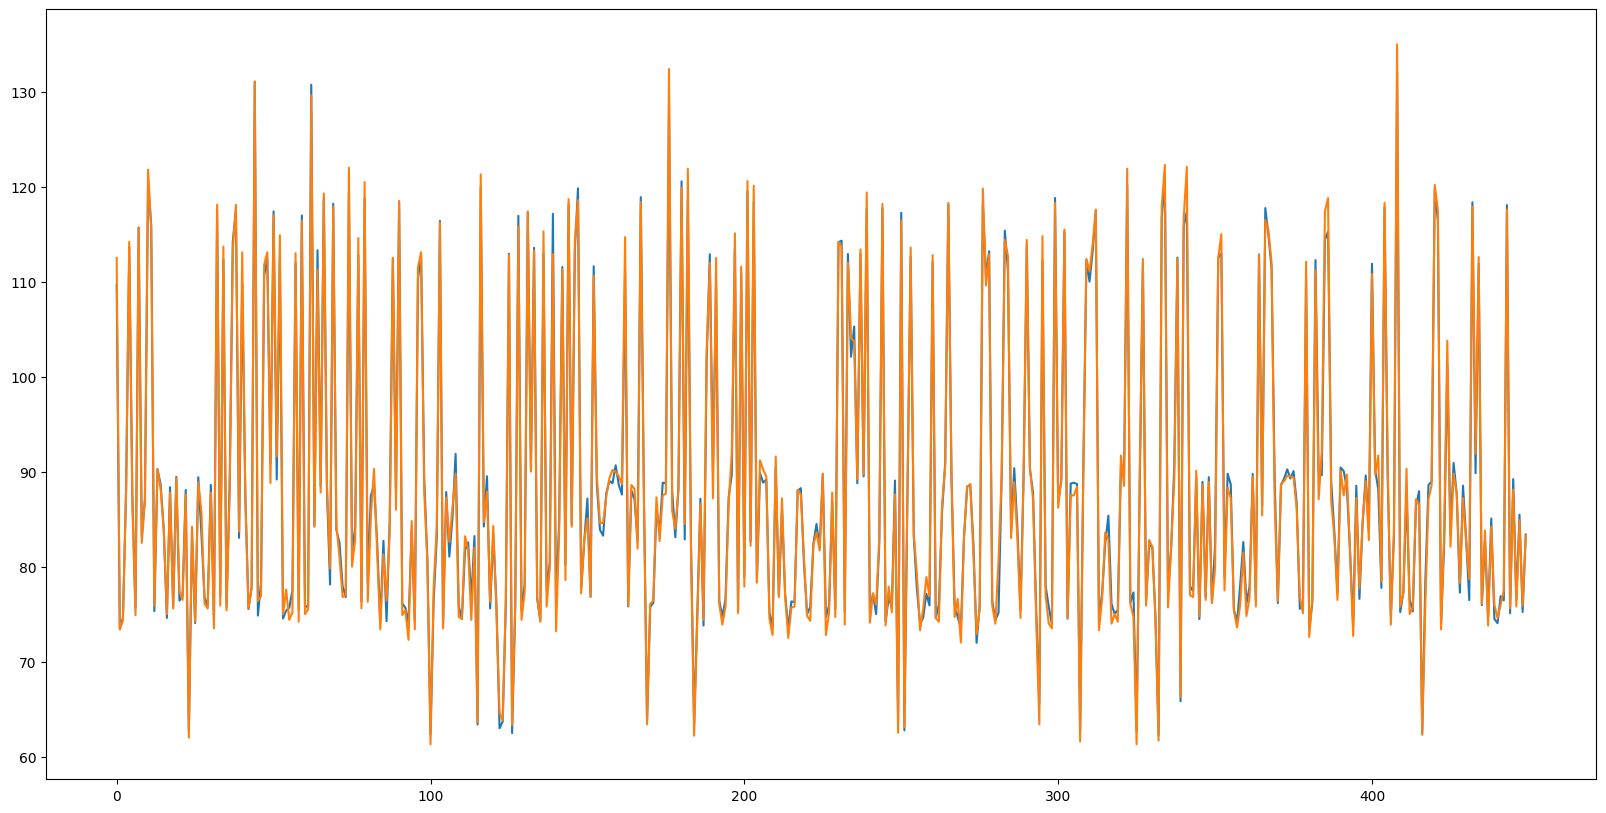

In [166]:
pred_y = xgb_rgr.predict(train_test_dict['test_x'])

print('mse :', np.mean(np.square(pred_y-train_test_dict['test_y'])))
plt.figure(figsize=(20,10))
plt.plot(pred_y[-500:-50])
plt.plot(train_test_dict['test_y'][-500:-50])


In [ ]:
xgb_rgr = set_xgb()

xgb_params = {
      'max_depth': [2, 4, 6],
      'n_estimators': [100, 500, 1000],
      'colsample_bytree': [0.2, 0.6, 0.8],
      'min_child_weight': [3, 5, 7],
      'gamma': [0.3, 0.5, 0.7],
      'subsample': [0.4, 0.6, 0.8]
      }


rs_cv = RandomizedSearchCV(estimator=xgb_rgr, param_distributions=xgb_params,scoring = 'neg_mean_absolute_error', 
                           n_iter=25,n_jobs=-1, verbose=1)

rs_cv.fit(train_test_dict['train_x'], train_test_dict['train_y'])
print(rs_cv.best_params_)

In [ ]:


## 경기 정보 불러오기
cnt = 0

for i, hrno in enumerate(val_df.hrNo.values):
    try:

        detail_url =  f'https://apis.data.go.kr/B551015/API8_2/raceHorseInfo_2?serviceKey=%2FpKtn0KFociUr9CM316rFT6o8sUrRD8yjSLuICPzxXarC8O%2FrUc1pjHc%2FCpuEwB5r4%2BimnNKYuJEjPKARyZCuw%3D%3D&pageNo=1&numOfRows=10&hr_no={hrno}&meet={meet}&act_gubun=n&_type=json'
        response = requests.get(detail_url)

        contents = response.text

        ## json을 DataFrame으로 변환하기 ##
        #문자열을 json으로 변경
        json_ob = json.loads(contents)

        # 필요한 내용만 꺼내기
        body = json_ob['response']['body']['items']['item']
        dataframe = pd.json_normalize(body)
        cols = ['hrNo','ord1CntT','ord1CntY','ord2CntT','ord2CntY','ord3CntT','ord3CntY','rcCntT','rcCntY']

        # print(dataframe[cols])
    except Exception as e:
        print(hrno)
        print('e',e)



In [8]:
meet = 1 # 1: 서울, 2: 제주, 3: 부산
detail_url =  f'https://apis.data.go.kr/B551015/API8_2/raceHorseInfo_2?serviceKey=%2FpKtn0KFociUr9CM316rFT6o8sUrRD8yjSLuICPzxXarC8O%2FrUc1pjHc%2FCpuEwB5r4%2BimnNKYuJEjPKARyZCuw%3D%3D&pageNo=1&numOfRows=10&hr_no=0044916&meet={meet}&act_gubun=n&_type=json'
response = requests.get(detail_url)

contents = response.text

## json을 DataFrame으로 변환하기 ##
#문자열을 json으로 변경
json_ob = json.loads(contents)

# 필요한 내용만 꺼내기
body = json_ob['response']['body']['items']['item']
dataframe = pd.json_normalize(body)
cols = ['hrNo','ord1CntT','ord1CntY','ord2CntT','ord2CntY','ord3CntT','ord3CntY','rcCntT','rcCntY']
print(dataframe)

   birthday   chaksunT faHrName   faHrNo     hrLastAmt hrName     hrNo meet  \
0  20180321  177330000     언캡처드  0044993  38,897천원(개별)   마이티칩  0044916   서울   

   moHrName   moHrNo name  ord1CntT  ord1CntY  ord2CntT  ord2CntY  ord3CntT  \
0  BAGANARA  6129683   미국         4         0         1         1         3   

   ord3CntY owName    owNo rank  rating  rcCntT  rcCntY sex trName    trNo  
0         1    조병태  113005   외2       0      13       4   수    서홍수  070160  


In [19]:
val_df.track.unique()

array(['다습 (11%)', '다습 (12%)', '양호 (6%)', '양호 (9%)', '건조 (3%)',
       '다습 (10%)', '포화 (18%)', '양호 (5%)', '건조 (4%)', '건조 (5%)',
       '포화 (16%)', '불량 (20%)', '양호 (8%)', '다습 (14%)', '포화 (15%)',
       '포화 (17%)', '포화 (19%)', '다습 (13%)', '양호 (7%)', '건조 (2%)'],
      dtype=object)

In [36]:
df[['Wg', 'amt']] = df.wgHr.str.replace(')','').str.split('(',expand=True)

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [45]:
df['amt'].replace('', np.nan, inplace=True)
df.amt.fillna(0, inplace=True)
df

age ageCond budam  buga1  buga2  buga3  chaksun1  chaksun2  chaksun3  \
0     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
1     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
2     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
3     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
4     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
..  ...     ...   ...    ...    ...    ...       ...       ...       ...   
81    4    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   
82    6    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   
83    4    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   
84    5    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   
85    5    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   

    chaksun4  chaksun5  chulNo diffUnit  hrName     hrNo  ilsu jkName    jkNo  \
0    2420000   1540000       2        -  이스트임팩트  0042497     4   안토니오  080576   
1    2420000   1540000       7       16    선더챔프  0043132     4    함완식  080342   
2    2420000   1540000      10        5     대완구  0041986     4    김효정  080578   
3    2420000   1540000       8        ¾  스위트주스바  0043220     4    박을운  080339   
4    2420000   1540000       9        ½   쿨프린세스  0042278     4    권석원  080511   
..       ...       ...     ...      ...     ...      ...   ...    ...     ...   
81   3750000   3000000       1       1½   와일드삭스  0044287    49    정정희  080530   
82   3750000   3000000       2        5   캡틴브라보  0040452    49    김태희  080603   
83   3750000   3000000       7        1   그레이토르  0044685    49    장추열  080476   
84   3750000   3000000       5       2½    스프링꿈  0045121    49    이상규  080609   
85   3750000   3000000      11        8   쿨프린세스  0042278    49    김철호  080434   

   meet name  ord    owName    owNo  plcOdds prizeCond  rank  rating  \
0    서울   한국    1       김영구  110003   9999.9      R0~0  국6등급       0   
1    서울   한국    2       최동근  116045   9999.9      R0~0  국6등급       0   
2    서울   한국    3      김진영a  105040   9999.9      R0~0  국6등급       0   
3    서울   한국    4       정영식  104154   9999.9      R0~0  국6등급       0   
4    서울   한국    5       이용대  010641      1.0      R0~0  국6등급       0   
..  ...  ...  ...       ...     ...      ...       ...   ...     ...   
81   서울   한국    7       김창식  010352      3.5     R1~65  국3등급      53   
82   서울   한국    8       김용래  065012      4.1     R1~65  국3등급      63   
83   서울   한국    9       제일우  121020      2.5     R1~65  국3등급      58   
84   서울   미국   10  (주)디알엠씨티  114026     21.1     R1~65  국3등급      53   
85   서울   한국   11       이용대  010641     10.5     R1~65  국3등급      51   

      rcDate rcDay  rcDist rcName  rcNo  rcTime  seG1fAccTime  seG3fAccTime  \
0   20210129   금요일    1200     일반     2    72.8          60.1          36.0   
1   20210129   금요일    1200     일반     2    75.6          61.2          36.2   
2   20210129   금요일    1200     일반     2    76.5          63.2          38.1   
3   20210129   금요일    1200     일반     2    76.7          62.4          36.9   
4   20210129   금요일    1200     일반     2    76.7          62.7          37.2   
..       ...   ...     ...    ...   ...     ...           ...           ...   
81  20230701   토요일    1200     일반    10    73.1          59.9          35.8   
82  20230701   토요일    1200     일반    10    74.0          60.7          36.5   
83  20230701   토요일    1200     일반    10    74.2          60.8          36.5   
84  20230701   토요일    1200     일반    10    74.6          61.1          36.8   
85  20230701   토요일    1200     일반    10    76.0          61.7          37.1   

    seS1fAccTime  se_1cAccTime  se_2cAccTime  se_3cAccTime  se_4cAccTime sex  \
0           13.2           0.0           0.0          24.1          42.1   거   
1           13.8           0.0           0.0          24.4          42.3   수   
2           13.8           0.0           0.0          25.2      

In [46]:
df.amt.astype(int)

0      4
1      4
2      0
3     -1
4      6
      ..
81     6
82     7
83    13
84     9
85     6
Name: amt, Length: 23426, dtype: int32

In [28]:
df.weather.unique()

array(['맑음', '흐림', '비', '안개', '눈'], dtype=object)